https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews/kernels

Lu Sun

# Data Cleaning

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv",index_col=0)

### Data Exploration

In [5]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


Text(0,0.5,'Count of Reviews')

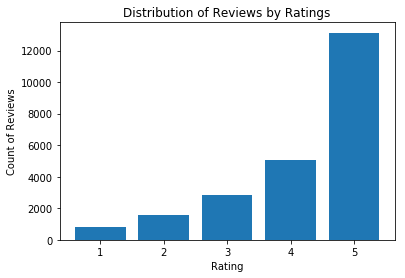

In [14]:
plt.bar(df.groupby('Rating').count().index.values,df.groupby('Rating').count()['Clothing ID'])
plt.title('Distribution of Reviews by Ratings')
plt.xlabel('Rating')
plt.ylabel('Count of Reviews')

In [131]:
df[(df.Rating==1) | (df.Rating==2)].count()['Clothing ID']/df.count()['Clothing ID']

0.10248658775440687

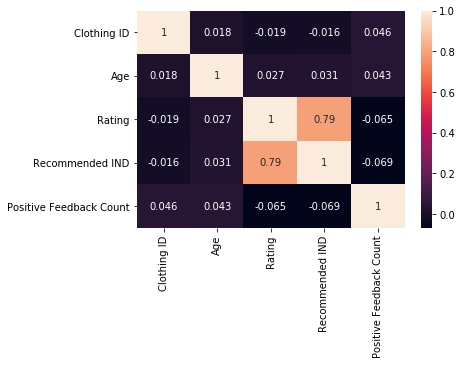

In [16]:
sns.heatmap(data=df.corr(), annot=True)

Text(0.5,1,'Positive Review Percentages by Department')

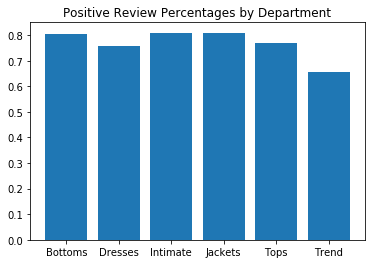

In [36]:
pos_review_by_department = df[(df.Rating==4) | (df.Rating==5)].groupby('Department Name')['Clothing ID'].count()
all_review_by_department = df.groupby('Department Name')['Clothing ID'].count()
ratios = pos_review_by_department/all_review_by_department
plt.bar(ratios.index.values, ratios)
plt.title('Positive Review Percentages by Department')

In [44]:
# Missing Data
(len(df)-df.count())/len(df)

Clothing ID                0.000000
Age                        0.000000
Title                      0.162224
Review Text                0.035979
Rating                     0.000000
Recommended IND            0.000000
Positive Feedback Count    0.000000
Division Name              0.000596
Department Name            0.000596
Class Name                 0.000596
dtype: float64

### Data Processing

In [70]:
df=df.dropna(axis=0,how='any')

#Ignore all reviews with rating = 3, since they tend to have a neutral sentiment. 
#Reviews with a rating of 4 or higher will be considered positive
#Reviews with rating of 2 or lower will have a negative sentiment.

df = df[df['Rating'] != 3]
df['Sentiment'] = df['Rating'] >=4
df['Sentiment'][df['Sentiment']==True] = 'Positive'
df['Sentiment'][df['Sentiment']==False]= 'Negative'


C:\Users\sunlu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [46]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import re

# Categorize reviews to positive and negative
df_pos = df[df['Sentiment']=='Positive']
df_neg = df[df['Sentiment']=='Negative']
print(df_pos['Review Text'].head(1))

# Convert review text to strings
a_pos = df_pos['Review Text'].str.lower().str.cat(sep=' ')
a_neg = df_neg['Review Text'].str.lower().str.cat(sep=' ')
print(a_pos[:50])

# removes punctuation,numbers and returns list of words
b_pos = re.sub('[^A-Za-z]+', ' ', a_pos)
b_pos2 = re.sub('[^A-Za-z]', ' ', a_pos)
b_neg = re.sub('[^A-Za-z]+', ' ', a_neg)
print(b_pos[:50])
print(b_pos2[:50])

3    I love, love, love this jumpsuit. it's fun, fl...
Name: Review Text, dtype: object
i love, love, love this jumpsuit. it's fun, flirty
i love love love this jumpsuit it s fun flirty and
i love  love  love this jumpsuit  it s fun  flirty


Text(0,0.5,'Count or Reviews')

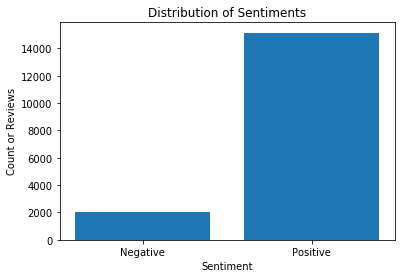

In [127]:
plt.bar(df.groupby('Sentiment').count().index.values,df.groupby('Sentiment').count()['Clothing ID'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count or Reviews')

In [125]:
df.groupby('Sentiment').count()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
Sentiment,,,,,,,,,,
Negative,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051
Positive,15147,15147,15147,15147,15147,15147,15147,15147,15147,15147


In [ ]:
# only need to run once
# import nltk
# nltk.download('stopwords')

In [47]:
# Tokenize words
tokens_pos = nltk.tokenize.word_tokenize(b_pos)
tokens_neg = nltk.tokenize.word_tokenize(b_neg)

print(tokens_pos[:20])

df_tokens_pos = pd.DataFrame({'Words':tokens_pos, 'Sentiment':1})
print(df_tokens_pos.head(20))
df_tokens_neg = pd.DataFrame({'Words':tokens_neg, 'Sentiment':0})
df_tokens = [df_tokens_pos, df_tokens_neg]
df_tokens = pd.concat(df_tokens)

['i', 'love', 'love', 'love', 'this', 'jumpsuit', 'it', 's', 'fun', 'flirty', 'and', 'fabulous', 'every', 'time', 'i', 'wear', 'it', 'i', 'get', 'nothing']
    Sentiment     Words
0           1         i
1           1      love
2           1      love
3           1      love
4           1      this
5           1  jumpsuit
6           1        it
7           1         s
8           1       fun
9           1    flirty
10          1       and
11          1  fabulous
12          1     every
13          1      time
14          1         i
15          1      wear
16          1        it
17          1         i
18          1       get
19          1   nothing


In [48]:
#remove all the stopwords from the text
# nltk.download('punkt')  # only need to run once
stop_words = list(stopwords.words('english')) 
words = df_tokens[~df_tokens['Words'].isin(stop_words)]

print(stop_words[:50])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be']


In [49]:
# Remove single characters and numbers
words_cleaned = words[words['Words'].str.len()>2]
words_cleaned = words_cleaned[~words_cleaned['Words'].str.isnumeric()]

# Feature Selection & Model Training

Select Model Features

In [50]:
# Get frequency of words in both positive and negative reviews
word_dict_pos = nltk.FreqDist(words_cleaned[words_cleaned['Sentiment']==1]['Words'])
word_dict_neg = nltk.FreqDist(words_cleaned[words_cleaned['Sentiment']==0]['Words'])

print(display(word_dict_pos))

FreqDist({'love': 6671,
          'jumpsuit': 171,
          'fun': 588,
          'flirty': 57,
          'fabulous': 134,
          'every': 455,
          'time': 780,
          'wear': 4818,
          'get': 1304,
          'nothing': 146,
          'great': 4701,
          'compliments': 846,
          'shirt': 1716,
          'flattering': 2609,
          'due': 229,
          'adjustable': 69,
          'front': 840,
          'tie': 272,
          'perfect': 3113,
          'length': 1996,
          'leggings': 609,
          'sleeveless': 63,
          'pairs': 113,
          'well': 2460,
          'cardigan': 348,
          'aded': 1,
          'basket': 12,
          'hte': 62,
          'last': 260,
          'mintue': 1,
          'see': 1171,
          'would': 3023,
          'look': 2534,
          'like': 4412,
          'person': 861,
          'store': 1496,
          'pick': 53,
          'went': 694,
          'teh': 15,
          'darkler': 1,
          'color': 

None


In [51]:
# Select more features from negative reviews 
# due to relatively small sample size in negative reviews 
# and worse model performance in predicting negative reviews

# N_pos = 150
N_neg = 300  
# dict_pos = [i[0] for i in word_dict_pos.most_common(N_pos)]
dict_neg = [i[0] for i in word_dict_neg.most_common(N_neg)]
# word_dict = list(set(dict_pos+dict_neg))
word_dict = dict_neg

# Number of features
print(len(word_dict))

300


In [52]:
print(word_dict)

['dress', 'like', 'top', 'would', 'fabric', 'fit', 'size', 'back', 'ordered', 'look', 'small', 'really', 'love', 'shirt', 'wear', 'material', 'one', 'looks', 'color', 'much', 'looked', 'also', 'even', 'way', 'quality', 'made', 'retailer', 'large', 'cute', 'sweater', 'model', 'could', 'great', 'work', 'tried', 'wanted', 'cut', 'well', 'short', 'disappointed', 'however', 'online', 'flattering', 'waist', 'pretty', 'going', 'loved', 'big', 'design', 'beautiful', 'good', 'see', 'thin', 'nice', 'return', 'thought', 'get', 'huge', 'right', 'unfortunately', 'first', 'petite', 'tight', 'bought', 'price', 'usually', 'colors', 'skirt', 'picture', 'long', 'got', 'shape', 'chest', 'cheap', 'medium', 'pants', 'sleeves', 'front', 'length', 'returned', 'felt', 'store', 'think', 'bottom', 'lbs', 'still', 'person', 'reviews', 'wearing', 'style', 'body', 'runs', 'high', 'arms', 'little', 'white', 'bit', 'unflattering', 'around', 'soft', 'better', 'super', 'excited', 'boxy', 'returning', 'looking', 'wide'

Convert Text to Vectors

In [53]:
# Select list of words from word_dict in review text 
import string
def text_process(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english') and word.lower() in word_dict]

In [91]:
# select model data from unbalanced dataset

num_of_neg_reviews = len(df[df.Sentiment=='Negative'])
neg_reviews = df[df.Sentiment=='Negative']
pos_reviews = df[df.Sentiment=='Positive'].sample(n=num_of_neg_reviews,random_state=0)
model_data = pd.concat([pos_reviews, neg_reviews])

print(model_data.head(5))

X_review=model_data['Review Text']
y= model_data['Sentiment']

       Clothing ID  Age                          Title  \
18410          876   69                          Love!   
14198          867   49                      So pretty   
20767         1110   24  Velvet maxi dress for the win   
11743          960   51                          Love!   
10100          863   29                Beautiful color   

                                             Review Text  Rating  \
18410  I love how unique this top is, especially the ...       5   
14198  I took a chance and ordered this top on sale, ...       5   
20767  This velvet maxi dress is what fall dreams are...       5   
11743  I absolutely love this vest. it fits extremely...       5   
10100  This shirt is such a beautiful color! the lave...       5   

       Recommended IND  Positive Feedback Count Division Name Department Name  \
18410                1                        0       General            Tops   
14198                1                        2       General            Tops   

In [92]:
from sklearn.feature_extraction.text import CountVectorizer
X_review=CountVectorizer(analyzer=text_process).fit_transform(X_review)

Split dataset to train, validation and test set

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.2, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

Train Model Using Support Vector Machine

In [107]:
from sklearn import svm

# model 1 - SVM with linear kernel
clf1 = svm.LinearSVC()
clf1.fit(X_train, y_train)

# model 2 - SVM with RBF kernel
clf2 = svm.SVC(kernel='rbf')
clf2.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Model Selection

Training Set

In [108]:
# Accuracy Ratio
y_score1=clf1.predict(X_train)
accuracy1=(sum(y_score1==y_train)/len(y_train))

y_score2=clf2.predict(X_train)
accuracy2=(sum(y_score2==y_train)/len(y_train))

print(accuracy1)
print(accuracy2)

0.90625
0.854039634146


In [117]:
from sklearn.metrics import confusion_matrix, classification_report

# model 1
print ('Model 1\n')
print(confusion_matrix(y_train, y_score1))
print('\n')
print(classification_report(y_train, y_score1))

# model 2
print ('\nModel2 \n')
print(confusion_matrix(y_train, y_score2))
print('\n')
print(classification_report(y_train, y_score2))

Model 1

[[1186  137]
 [ 109 1192]]


             precision    recall  f1-score   support

   Negative       0.92      0.90      0.91      1323
   Positive       0.90      0.92      0.91      1301

avg / total       0.91      0.91      0.91      2624


Model2 

[[1130  193]
 [ 190 1111]]


             precision    recall  f1-score   support

   Negative       0.86      0.85      0.86      1323
   Positive       0.85      0.85      0.85      1301

avg / total       0.85      0.85      0.85      2624



Validation Set - Model Selection

In [113]:
# Accuracy Ratio
y_score_valid1=clf1.predict(X_valid)
accuracy_valid1=(sum(y_score_valid1==y_valid)/len(y_valid))
print(accuracy_valid1)

y_score_valid2=clf2.predict(X_valid)
accuracy_valid2=(sum(y_score_valid2==y_valid)/len(y_valid))
print(accuracy_valid2)

0.815829528158
0.821917808219


In [114]:
print('Model 1\n')
print(confusion_matrix(y_valid, y_score_valid1))
print('\n')
print(classification_report(y_valid, y_score_valid1))

print('\nModel 2\n')
print(confusion_matrix(y_valid, y_score_valid2))
print('\n')
print(classification_report(y_valid, y_score_valid2))

Model 1

[[249  63]
 [ 58 287]]


             precision    recall  f1-score   support

   Negative       0.81      0.80      0.80       312
   Positive       0.82      0.83      0.83       345

avg / total       0.82      0.82      0.82       657


Model 2

[[253  59]
 [ 58 287]]


             precision    recall  f1-score   support

   Negative       0.81      0.81      0.81       312
   Positive       0.83      0.83      0.83       345

avg / total       0.82      0.82      0.82       657



# Model Evaluation

Model 1 is selected. Evaluate the model performance on test set

In [115]:
y_score_test=clf1.predict(X_test)
accuracy_test=(sum(y_score_test==y_test)/len(y_test))
print(accuracy_test)

0.825822168088


In [116]:
print(confusion_matrix(y_test, y_score_test))
print('\n')
print(classification_report(y_test, y_score_test))

[[337  79]
 [ 64 341]]


             precision    recall  f1-score   support

   Negative       0.84      0.81      0.82       416
   Positive       0.81      0.84      0.83       405

avg / total       0.83      0.83      0.83       821

